<a href="https://colab.research.google.com/github/dton24/PortfolioProjects/blob/main/SCE_Logistic_Regression_Intentional_Attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


### Preprocessing

In [ ]:
df = pd.read_excel('vandalism_log_reg.xlsx', sheet_name = 'second')

In [ ]:
df

,SEASON,OUTAGE_START,DAY_OF_OUTAGE,INTENTIONAL ATTACK,OUTAGE.DURATION,RESIDENTIAL,COMMERCIAL,INDUSTRIAL
0,Summer,Afternoon,Friday,0,3060.0,2308736,276286,10673
1,Spring,Evening,Sunday,1,1.0,2345860,284978,9898
2,Autumn,Evening,Tuesday,0,3000.0,2300291,276463,10150
3,Summer,Night,Tuesday,0,2550.0,2317336,278466,11010
4,Summer,Night,Saturday,0,1740.0,2374674,289044,9812
...,...,...,...,...,...,...,...,...
1529,Winter,Morning,Tuesday,0,720.0,330738,60017,3639
1530,Unknown,NaN,NaN,0,NaN,309997,53709,2331
1531,Summer,Night,Saturday,0,59.0,367206,65971,3052
1532,Summer,Morning,Saturday,0,181.0,367206,65971,3052


In [ ]:
df.isna().sum()

SEASON                 0
OUTAGE_START           9
DAY_OF_OUTAGE          9
INTENTIONAL ATTACK     0
OUTAGE.DURATION       58
RESIDENTIAL            0
COMMERCIAL             0
INDUSTRIAL             0
dtype: int64

In [ ]:
df.dropna()

,SEASON,OUTAGE_START,DAY_OF_OUTAGE,INTENTIONAL ATTACK,OUTAGE.DURATION,RESIDENTIAL,COMMERCIAL,INDUSTRIAL
0,Summer,Afternoon,Friday,0,3060.0,2308736,276286,10673
1,Spring,Evening,Sunday,1,1.0,2345860,284978,9898
2,Autumn,Evening,Tuesday,0,3000.0,2300291,276463,10150
3,Summer,Night,Tuesday,0,2550.0,2317336,278466,11010
4,Summer,Night,Saturday,0,1740.0,2374674,289044,9812
...,...,...,...,...,...,...,...,...
1526,Spring,Night,Tuesday,1,0.0,714365,107551,27847
1528,Summer,Afternoon,Tuesday,0,220.0,714365,107551,27847
1529,Winter,Morning,Tuesday,0,720.0,330738,60017,3639
1531,Summer,Night,Saturday,0,59.0,367206,65971,3052


Explore categorical variables

In [ ]:
df['INTENTIONAL ATTACK'].unique()

array([0, 1])

In [ ]:
df['INTENTIONAL ATTACK'].dtype

dtype('int64')

In [ ]:
df['SEASON'].unique()

array(['Summer', 'Spring', 'Autumn', 'Winter', 'Unknown'], dtype=object)

In [ ]:
# Drop rows where the 'SEASON' column has the value 'Unknown'
df = df[df['SEASON'] != 'Unknown']

In [ ]:
df['DAY_OF_OUTAGE'].unique()

array(['Friday', 'Sunday', 'Tuesday', 'Saturday', 'Wednesday', 'Monday',
       'Thursday'], dtype=object)

In [ ]:
# Drop rows where the 'DAY_OF_OUTAGE' column has the value 'Unknown'
df = df[df['DAY_OF_OUTAGE'] != 'nan']

In [ ]:
df.shape

(1525, 8)

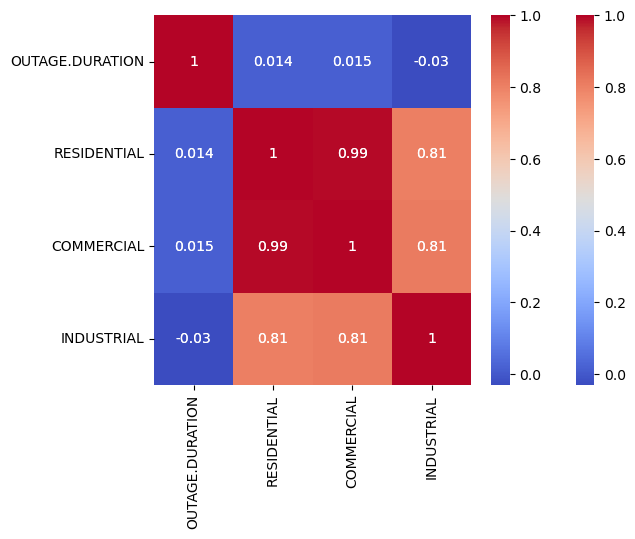

In [ ]:
%matplotlib inline
# Assuming you have a DataFrame 'df' with numerical columns
correlation_matrix = df[['OUTAGE.DURATION', 'RESIDENTIAL','COMMERCIAL','INDUSTRIAL']].corr()

# This will give you a DataFrame with the correlation values

import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn to create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assume df is your original DataFramet

# Initialize the StandardScaler
scaler = StandardScaler()

# Select columns to be scaled
columns_to_scale = ['OUTAGE.DURATION', 'RESIDENTIAL','COMMERCIAL','INDUSTRIAL']

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(df[columns_to_scale])


In [ ]:
df.loc[:, columns_to_scale] = X_scaled

In [ ]:
df.head()

,SEASON,OUTAGE_START,DAY_OF_OUTAGE,INTENTIONAL ATTACK,OUTAGE.DURATION,RESIDENTIAL,COMMERCIAL,INDUSTRIAL
0,Summer,Afternoon,Friday,0,0.073159,-0.684571,-0.737383,-0.564625
1,Spring,Evening,Sunday,1,-0.441783,-0.675271,-0.721751,-0.583644
2,Autumn,Evening,Tuesday,0,0.063059,-0.686686,-0.737065,-0.577460
3,Summer,Night,Tuesday,0,-0.012692,-0.682416,-0.733463,-0.556354
4,Summer,Night,Saturday,0,-0.149045,-0.668053,-0.714439,-0.585755


Create Dummies

In [ ]:
import pandas as pd

# Let's assume df is your DataFrame and contains all the columns mentioned

# Create dummy variables for the categorical columns and drop the first category
dummies = pd.get_dummies(df[['SEASON', 'OUTAGE_START', 'DAY_OF_OUTAGE']], drop_first=True)

dummies = dummies.astype(int)

In [ ]:
dummies.head()

,SEASON_Spring,SEASON_Summer,SEASON_Winter,OUTAGE_START_Evening,OUTAGE_START_Morning,OUTAGE_START_Night,DAY_OF_OUTAGE_Monday,DAY_OF_OUTAGE_Saturday,DAY_OF_OUTAGE_Sunday,DAY_OF_OUTAGE_Thursday,DAY_OF_OUTAGE_Tuesday,DAY_OF_OUTAGE_Wednesday
0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
df.drop(['SEASON', 'OUTAGE_START', 'DAY_OF_OUTAGE'], axis=1, inplace=True)

In [ ]:
# Join the dummy variables with the numeric columns in the original DataFrame
df = df.join(dummies)

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce').dropna()

In [ ]:
df

,INTENTIONAL ATTACK,OUTAGE.DURATION,RESIDENTIAL,COMMERCIAL,INDUSTRIAL,SEASON_Spring,SEASON_Summer,SEASON_Winter,OUTAGE_START_Evening,OUTAGE_START_Morning,OUTAGE_START_Night,DAY_OF_OUTAGE_Monday,DAY_OF_OUTAGE_Saturday,DAY_OF_OUTAGE_Sunday,DAY_OF_OUTAGE_Thursday,DAY_OF_OUTAGE_Tuesday,DAY_OF_OUTAGE_Wednesday
0,0,0.073159,-0.684571,-0.737383,-0.564625,0,1,0,0,0,0,0,0,0,0,0,0
1,1,-0.441783,-0.675271,-0.721751,-0.583644,1,0,0,1,0,0,0,0,1,0,0,0
2,0,0.063059,-0.686686,-0.737065,-0.577460,0,0,0,1,0,0,0,0,0,0,1,0
3,0,-0.012692,-0.682416,-0.733463,-0.556354,0,1,0,0,0,1,0,0,0,0,1,0
4,0,-0.149045,-0.668053,-0.714439,-0.585755,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1,-0.441951,-1.083963,-1.040838,-0.143146,1,0,0,0,0,1,0,0,0,0,1,0
1528,0,-0.404917,-1.083963,-1.040838,-0.143146,0,1,0,0,0,0,0,0,0,0,1,0
1529,0,-0.320749,-1.180063,-1.126324,-0.737251,0,0,1,0,1,0,0,0,0,0,1,0
1531,0,-0.432019,-1.170927,-1.115616,-0.751657,0,1,0,0,0,1,0,1,0,0,0,0


### Build Model

In [ ]:
y = df['INTENTIONAL ATTACK']
X = df.drop(columns = 'INTENTIONAL ATTACK')

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -1.8557947199939402
       OUTAGE.DURATION  RESIDENTIAL  COMMERCIAL  INDUSTRIAL  SEASON_Spring  \
coeff        -4.721029     2.559459    -4.03028      0.6967       0.278534   

       SEASON_Summer  SEASON_Winter  OUTAGE_START_Evening  \
coeff      -1.207935      -0.424839             -0.735739   

       OUTAGE_START_Morning  OUTAGE_START_Night  DAY_OF_OUTAGE_Monday  \
coeff              0.549224            -0.07742             -0.403636   

       DAY_OF_OUTAGE_Saturday  DAY_OF_OUTAGE_Sunday  DAY_OF_OUTAGE_Thursday  \
coeff               -0.382639             -0.719948               -0.192546   

       DAY_OF_OUTAGE_Tuesday  DAY_OF_OUTAGE_Wednesday  
coeff              -0.247044                  -0.1632  


**Check for p-values; signifiance**

In [ ]:
# Assuming train_X and train_y are already defined and preprocessed
# Add a constant to the independent variables to include the intercept in the model
train_X_with_const = sm.add_constant(train_X)

# Fit the logistic regression model
logit_model = sm.Logit(train_y, train_X_with_const)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.384361
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:     INTENTIONAL ATTACK   No. Observations:                  885
Model:                          Logit   Df Residuals:                      868
Method:                           MLE   Df Model:                           16
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.3346
Time:                        00:43:09   Log-Likelihood:                -340.16
converged:                       True   LL-Null:                       -511.19
Covariance Type:            nonrobust   LLR p-value:                 4.672e-63
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8554      0.413     -4.488      0.000      -2.666   

In [ ]:
# Backward Elimination
import statsmodels.api as sm

def backward_elimination(data, target, significance_level = 0.2):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:] # exclude constant
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

selected_features = backward_elimination(train_X, train_y)
selected_features

['OUTAGE.DURATION',
 'RESIDENTIAL',
 'COMMERCIAL',
 'INDUSTRIAL',
 'SEASON_Spring',
 'SEASON_Summer',
 'SEASON_Winter',
 'OUTAGE_START_Evening',
 'OUTAGE_START_Morning',
 'DAY_OF_OUTAGE_Saturday',
 'DAY_OF_OUTAGE_Sunday']

**Build New Model w/ Selected Columns**

In [ ]:
y = df['INTENTIONAL ATTACK']
X = df[['OUTAGE.DURATION','RESIDENTIAL','COMMERCIAL','INDUSTRIAL',
 'SEASON_Spring',
 'SEASON_Summer',
 'SEASON_Winter',
 'OUTAGE_START_Evening',
 'OUTAGE_START_Morning',
 'DAY_OF_OUTAGE_Saturday',
 'DAY_OF_OUTAGE_Sunday']]

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -2.1151312129716024
       OUTAGE.DURATION  RESIDENTIAL  COMMERCIAL  INDUSTRIAL  SEASON_Spring  \
coeff        -4.721722     2.567187   -4.028708    0.690599       0.292132   

       SEASON_Summer  SEASON_Winter  OUTAGE_START_Evening  \
coeff      -1.179117      -0.408232             -0.721017   

       OUTAGE_START_Morning  DAY_OF_OUTAGE_Saturday  DAY_OF_OUTAGE_Sunday  
coeff              0.586934               -0.168685             -0.507484  


In [ ]:
# Visualize Coefficients

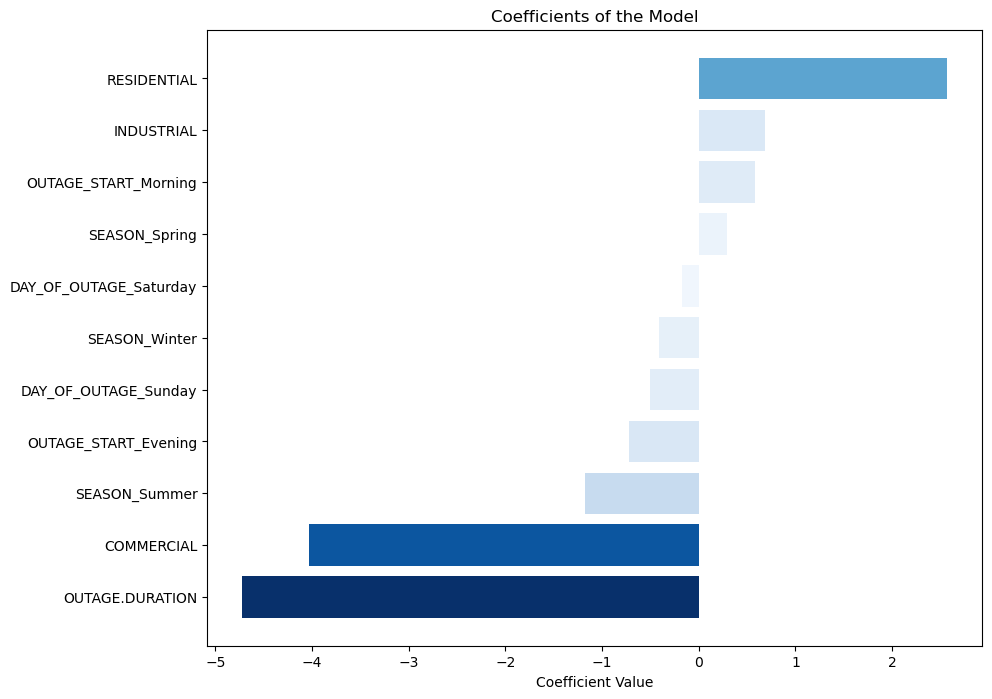

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients and corresponding labels
coefficients = {
    "OUTAGE.DURATION": -4.721722,
    "COMMERCIAL": -4.028708,
    "RESIDENTIAL": 2.567187,
    "INDUSTRIAL": 0.690599,
    "SEASON_Summer": -1.179117,
    "OUTAGE_START_Evening": -0.721017,
    "SEASON_Winter": -0.408232,
    "DAY_OF_OUTAGE_Sunday": -0.507484,
    "DAY_OF_OUTAGE_Saturday": -0.168685,
    "OUTAGE_START_Morning": 0.586934,
    "SEASON_Spring": 0.292132,
}

# Sorting the coefficients in descending order
sorted_coefficients = dict(sorted(coefficients.items(), key=lambda item: item[1], reverse=True))

# Creating a color map
colors = [plt.cm.Blues(np.abs(val)/max(np.abs(list(sorted_coefficients.values())))) for val in sorted_coefficients.values()]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_coefficients.keys()), list(sorted_coefficients.values()), color=colors)
plt.xlabel('Coefficient Value')
plt.title('Coefficients of the Model')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
599,0,0.787817,0.212183,0
403,0,0.240195,0.759805,1
857,0,0.919079,0.080921,0
353,0,0.817239,0.182761,0
1019,0,0.310401,0.689599,1
...,...,...,...,...
926,0,0.997907,0.002093,0
1065,0,0.999959,0.000041,0
213,1,0.724176,0.275824,0
245,1,0.643436,0.356564,0


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8395)

       Prediction
Actual   0   1
     0 598  53
     1  89 145
Confusion Matrix (Accuracy 0.8054)

       Prediction
Actual   0   1
     0 385  37
     1  78  91


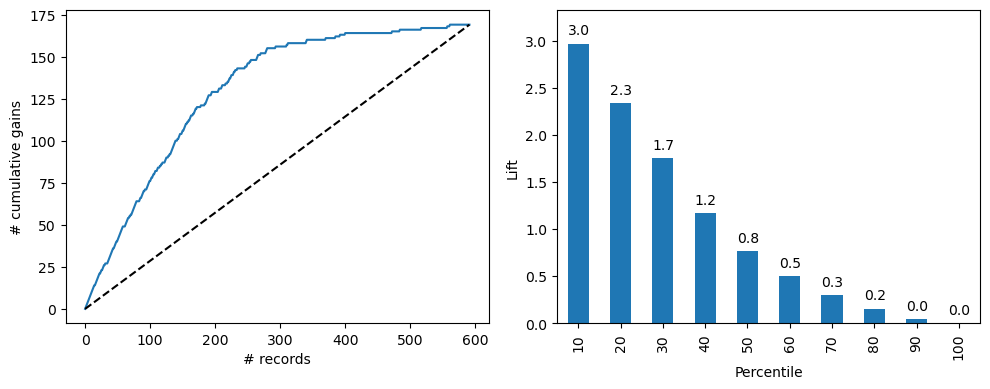

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])

plt.tight_layout()
plt.show()